# Importing Required Libraries

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix


# Loading Dataset

In [3]:
df = pd.read_csv("C:\\Users\\15879\\Desktop\\Telecom-final-prj\\Telecom churn.csv")

In [4]:
df.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


# Basic Understanding of Data

1. Checking the Dimensions of Dataset.

In [5]:
print("Total number of records/rows present in the dataset is:",df.shape[0])
print("Total number of attributes/columns present in the dataset is:",df.shape[1])

Total number of records/rows present in the dataset is: 243553
Total number of attributes/columns present in the dataset is: 14


2. Fetching the Attributes Names and what they represent.

In [6]:
df.columns

Index(['customer_id', 'telecom_partner', 'gender', 'age', 'state', 'city',
       'pincode', 'date_of_registration', 'num_dependents', 'estimated_salary',
       'calls_made', 'sms_sent', 'data_used', 'churn'],
      dtype='object')

📊 Inference:

- customer_id: Use to track and differentiate individual customers within the dataset.
- telecom_partner: Represents the telecom partner associated with the customer.
- gender: Provide the gender (sex) of the customer.
- age: Represents the customer's age in years and can be used to analyze age-related patterns and behaviors.
- state: The Indian state in which the customer is located.
- city: The city in which the customer is located.
- pincode: The pincode of the customer's location.
- date_of_registration: The date on which the customer registered with the telecom partner.
- num_dependents:The number of dependents (e.g. children) the customer has.
- estimated_salary: The customer's estimated salary.
- calls_made: Total calls made.
- sms_sent: Total sent message.
- data_used: The total data used. 
- churn: It indicates whether a customer has churned (1) or not (0) from the telecom provider. It is the variable we aim to predict using the other features.

3. Generating Basic Information of the data.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


📊 Inference:
* There is total **243553 records** and **14 columns** availabe in the dataset. **Out of 14 columns** there are **9 numerical columns** and **5 categorical columns.**

4. Computing Total No. of Missing Values.

In [8]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
customer_id,0
telecom_partner,0
gender,0
age,0
state,0
city,0
pincode,0
date_of_registration,0
num_dependents,0
estimated_salary,0


📊 Inference:

- None of the columns is having missing values.
- So we don't have to perform data imputation with mean or the median.

5. Checking Duplicate Records.

In [9]:
df[df.duplicated()]

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn


📊 Inference:

- There are no duplicate records present in the dataset.
- So we can say there is no Data Lekage in the dataset.

6. Performing Descriptive Statistical Analysis on Categorical Columns.

In [10]:
df.describe(include="object").T

,count,unique,top,freq
telecom_partner,243553,4,Reliance Jio,61123
gender,243553,2,M,145977
state,243553,28,Uttarakhand,8856
city,243553,6,Chennai,40749
date_of_registration,243553,1220,2020-01-01,200


7. Snapshot of the churn column

In [11]:
df.churn.value_counts()

0    194726
1     48827
Name: churn, dtype: int64

📊 Inference:

- date_of_registration column has a high cardinality
- telecom_partner, Gender, state and city Columns are having low cardinality and seems all relevant for predicting customer churned or not.

# Data Wrangling

- Data wrangling, also known as data munging, refers to the process of cleaning, transforming, and preparing raw data for analysis.
- It involves handling missing values, addressing inconsistencies and formatting data before it can be used for further analysis.

1. Showing Random Sample of Data.

In [12]:
df.sample(10)

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
134669,134670,BSNL,F,29,Sikkim,Bangalore,803779,2021-11-05,3,38824,71,42,6283,0
78993,78994,BSNL,M,48,Himachal Pradesh,Bangalore,477046,2021-01-30,0,136904,28,5,7046,0
119681,119682,Reliance Jio,F,23,Uttarakhand,Hyderabad,611643,2021-08-22,4,138083,70,17,2118,0
123147,123148,Vodafone,M,65,Odisha,Chennai,724157,2021-09-08,3,71423,3,30,9254,0
214222,214223,BSNL,M,28,Nagaland,Kolkata,149652,2022-12-08,1,116446,16,29,6861,0
46813,46814,Vodafone,F,74,Kerala,Kolkata,350576,2020-08-22,1,80172,30,12,4963,1
7210,7211,Reliance Jio,M,18,Tripura,Bangalore,736061,2020-02-06,1,123751,-1,29,7827,0
77377,77378,Vodafone,F,60,Karnataka,Bangalore,982788,2021-01-22,3,67433,71,46,6367,0
55041,55042,Vodafone,M,28,Chhattisgarh,Kolkata,487124,2020-10-02,2,134367,43,30,4614,0
10430,10431,Airtel,M,21,Goa,Kolkata,173588,2020-02-22,2,49789,37,50,2524,0


📊 Inference:

customer_id column represents a unique value for each customer and doesn't seem relevant for predicting customer churned or not. Therefore we can drop this feature.

2. Dropping Insignificant Feature and renaming values with more appropriate values for better analysis.

In [13]:
df.drop(columns=["customer_id"],inplace=True)

In [14]:
df["churn"].replace({0:"No",1:"Yes"},inplace=True)

In [15]:
df.head()

,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,No
1,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,No
2,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,Yes
3,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,Yes
4,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,No


📊 Inference:
    
* So far I have **converted raw data** into **well-structured data** to better analysis. 
* Next is to perform **Expolatory Data Analysis** and **derive insights from the data.**

# Explorator Data Analysis

1. Visualizing Target Variable.

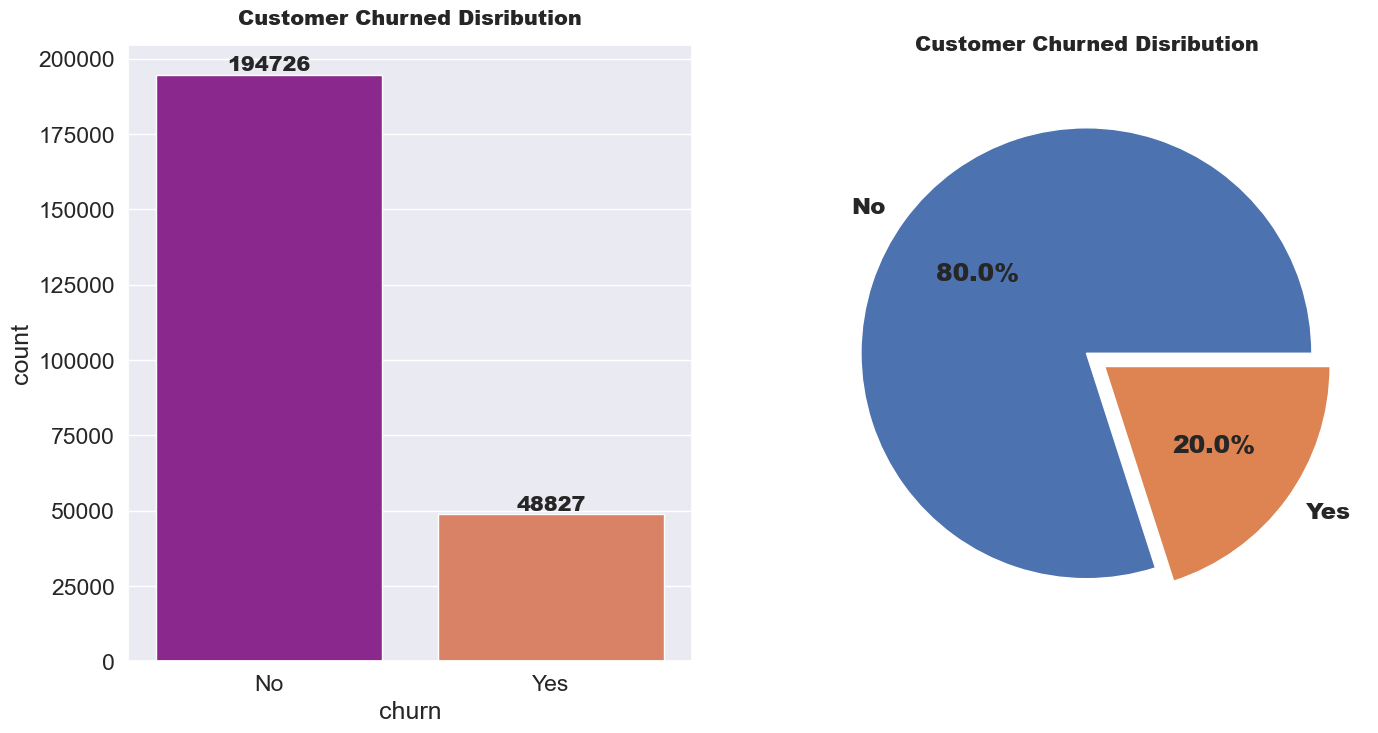

In [16]:
count = df["churn"].value_counts()

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
ax=sns.countplot(df["churn"],palette="plasma")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Churned Disribution",fontweight="black",size=15,pad=15)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("plasma"),
        textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Customer Churned Disribution",fontweight="black",size=15,pad=15)
plt.show()

📊 Inference:
    
- There is huge class-imbalance which can lead to bias in model performance.
- So to overcome this class-imbalance we have to use over-sampling technique from SMOTE.

In [17]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=df, hue="churn",palette="plasma")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)
        
    plt.title(f"Customer churned by {column}",fontweight="black",size=15,pad=15)
    plt.show()

2. Visualizing Customer Churned by telecom_partner.



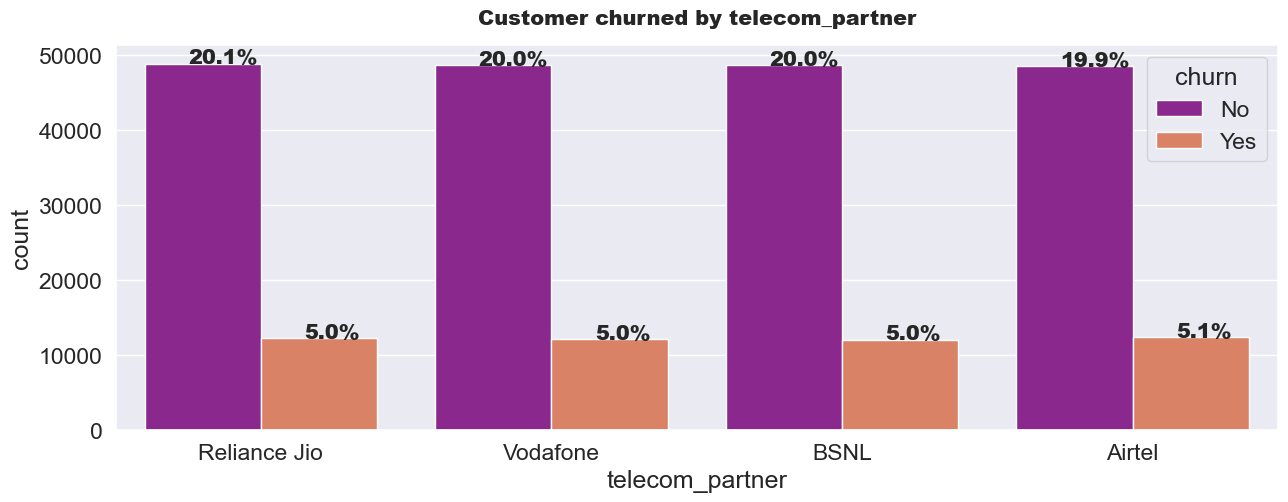

In [18]:
countplot("telecom_partner")

📊 Inference:

- The percentage of customer churn from all the companies appears to be approximately the same at 5.0% with only Airtel at   5.1% which means they have same share in caseof churn customer.



3. Visualizing Customer Churned by Gender.

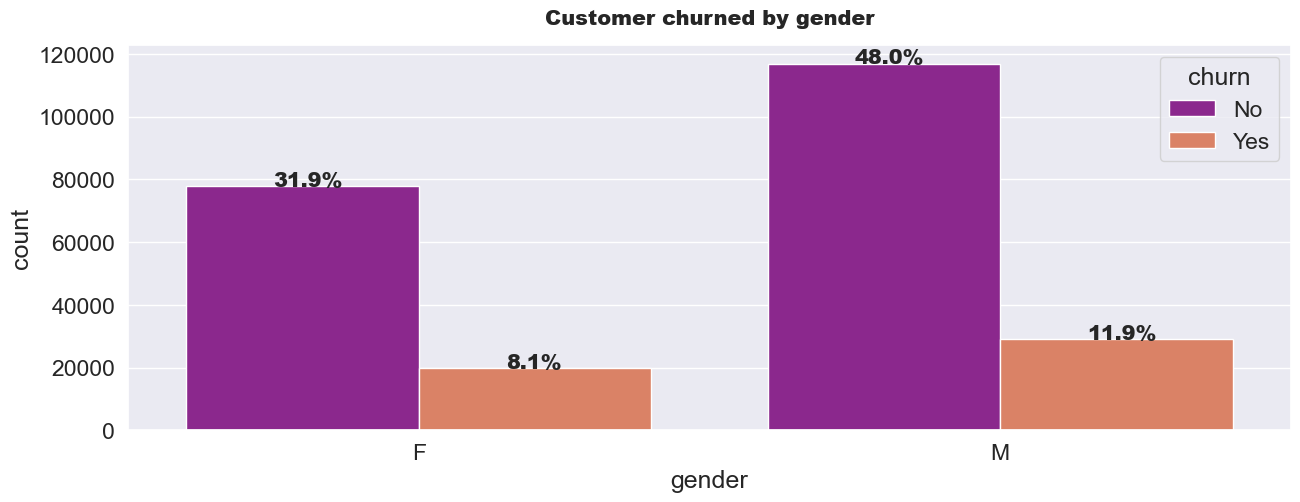

In [19]:
countplot("gender")

In [20]:
churn_data_gender=df[df['churn']=='Yes']['gender']
non_churn_data_gender=df[df['churn']=='No']['gender']
gender_value=list(churn_data_gender.value_counts())
genders=['Male',"Female"]

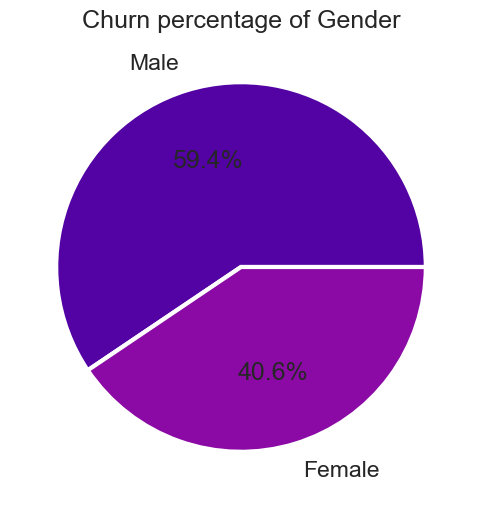

In [21]:
plt.figure(figsize=(8,6))
plt.pie(

gender_value,
autopct='%.1f%%',
labels=genders,
labeldistance=1.15,
wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }

)
plt.title("Churn percentage of Gender")
plt.show()

📊 Inference:

- The churned probabillity is more for the male customers compared to female customers. However if we are to consider the overall percentage churn with the piechart female customer have high percentage in leaving telecome company.


📊 Recommendation:

- Telecom providers can develop target marketing campaigns more towards female customers and focus on enhancing the overall  experience for both male and female customers.


4. Visualizing Customer Churned by City

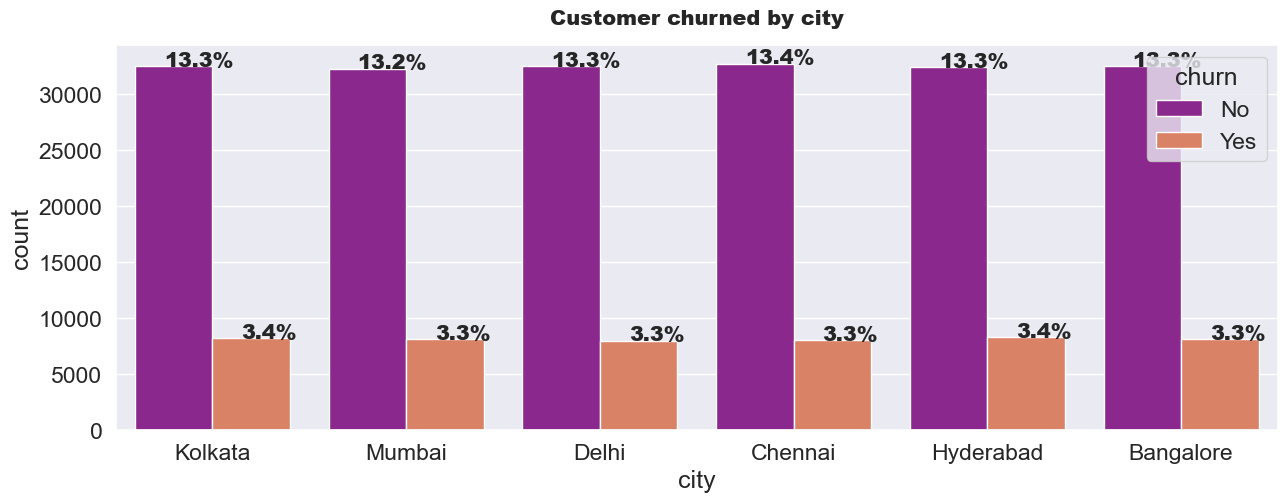

In [22]:
countplot("city")


📊 Inference:
    
- The percentage of customer churn from all the cities appears to be approximately the same at 3.3%.

📊 Recommendation:

- Telecom providers should continue to deploy the same strategies across all cities as it appears to be working.

5. Visualizing Customer Churn by "num_dependents".

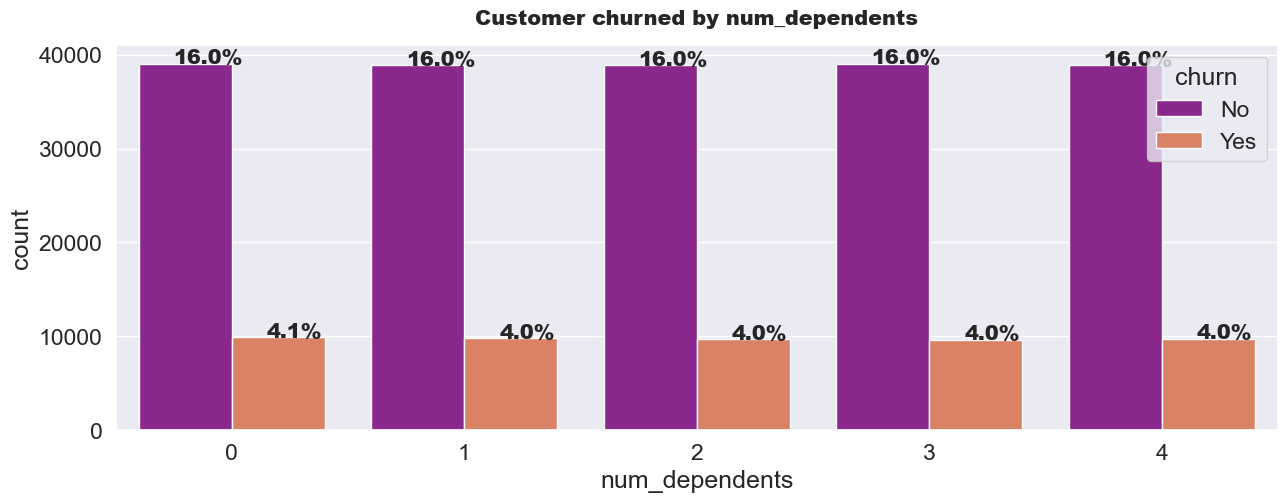

In [23]:
countplot("num_dependents")

📊 Inference:

- The percentage of customer churn from all customers appears to be approximately the same at 4.0% 
  except for customers with dependants at 4.1%.

📊 Recommendation:

- Telecom providers should continue to deploy the same strategies across all customers as it appears to be working with       more concentration to those with no dependent.

  


In [24]:
def continous_plot(column):
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    sns.histplot(x=column,hue="churn",data=df,kde=True,palette="plasma")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)

    plt.subplot(1,2,2)
    sns.boxplot(df["churn"],df[column],palette="plasma")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)
    plt.tight_layout()
    plt.show()


6.Visualizing Customer Churn by "age".


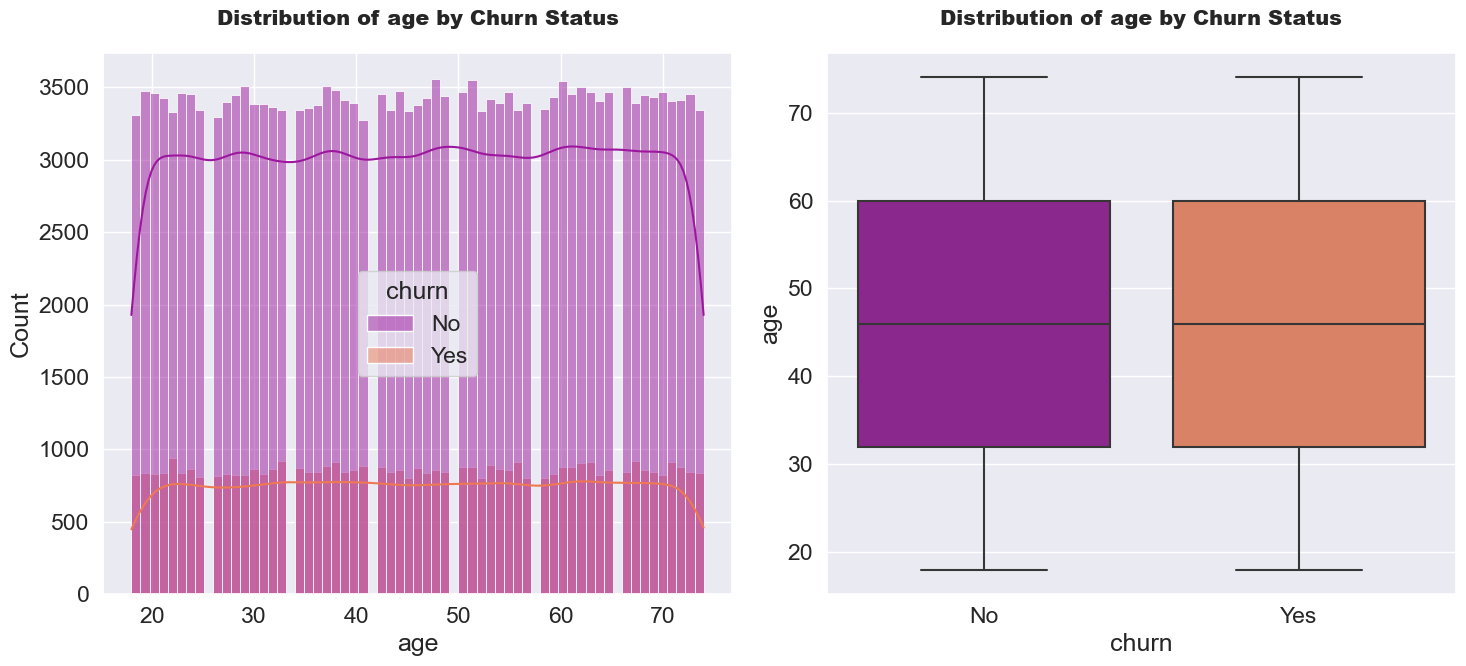

In [25]:
continous_plot("age")

📊 Inference:
    
- The median value of Age is approxiamately same for both the churned categories.
- Since the distribution is kind of similar for both churn category we can't make any relevant inference.

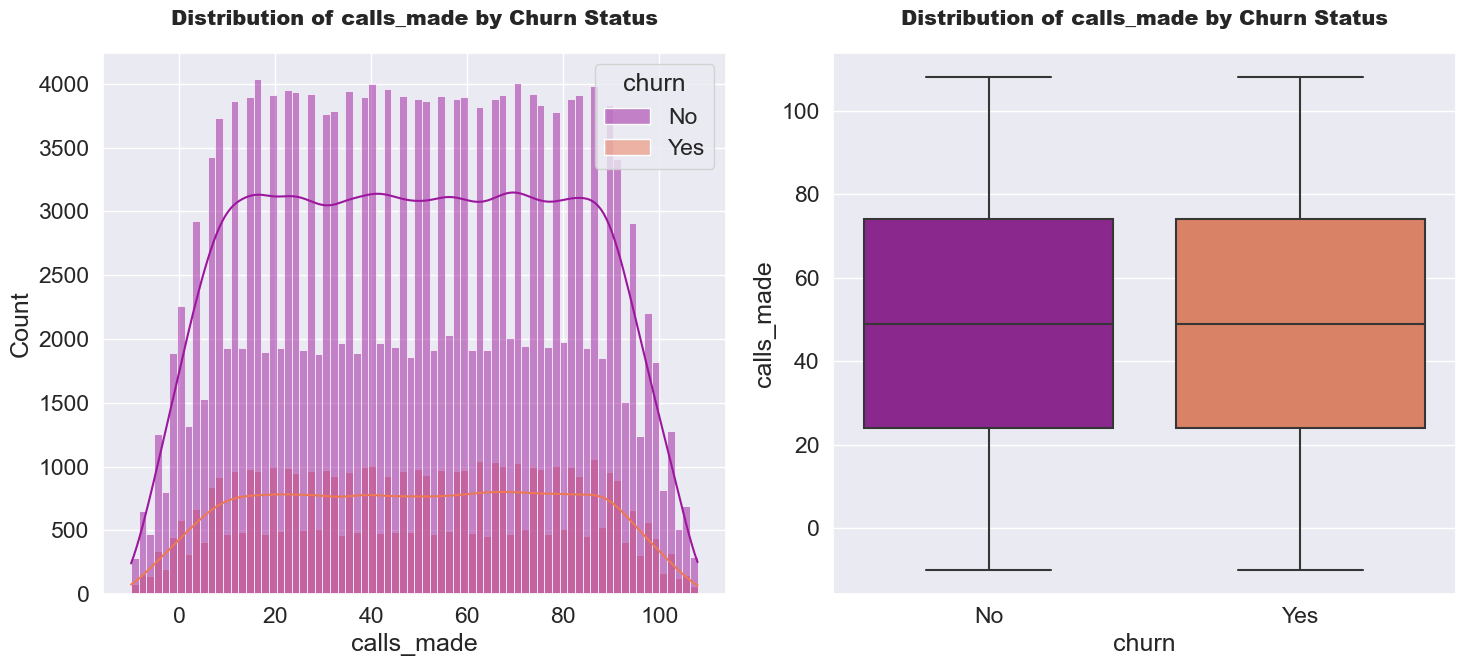

In [26]:
continous_plot("calls_made")

In [27]:
churn_data_calls_made=df[df['churn']=='Yes']['calls_made']
non_churn_calls_made=df[df['churn']=='No']['calls_made']

churn_value_calls_made=list(churn_data_calls_made.value_counts().sort_values())
non_churn_value_calls_made=list(non_churn_calls_made.value_counts().sort_values())

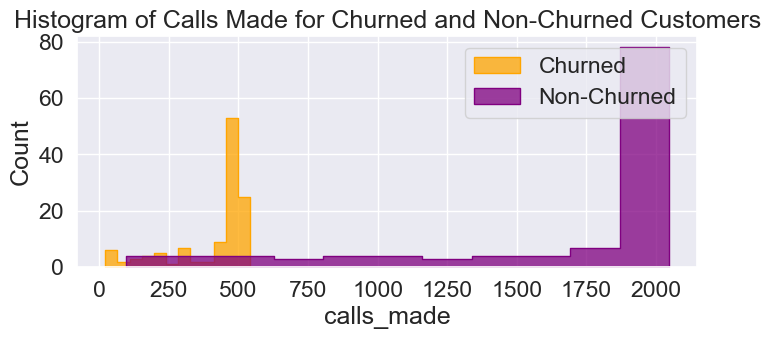

In [28]:
plt.figure(figsize=(8,3))
sns.histplot(churn_value_calls_made, element="step", label="Churned", color="orange")
sns.histplot(non_churn_value_calls_made, element="step", label="Non-Churned", color="purple")
plt.xlabel("calls_made")
plt.title("Histogram of Calls Made for Churned and Non-Churned Customers")
plt.legend()
plt.show()

📊 Inference:

- Non_Churn customers made higher calls than churn customers    
- The median value of Age is approxiamately same for both the churned categories.


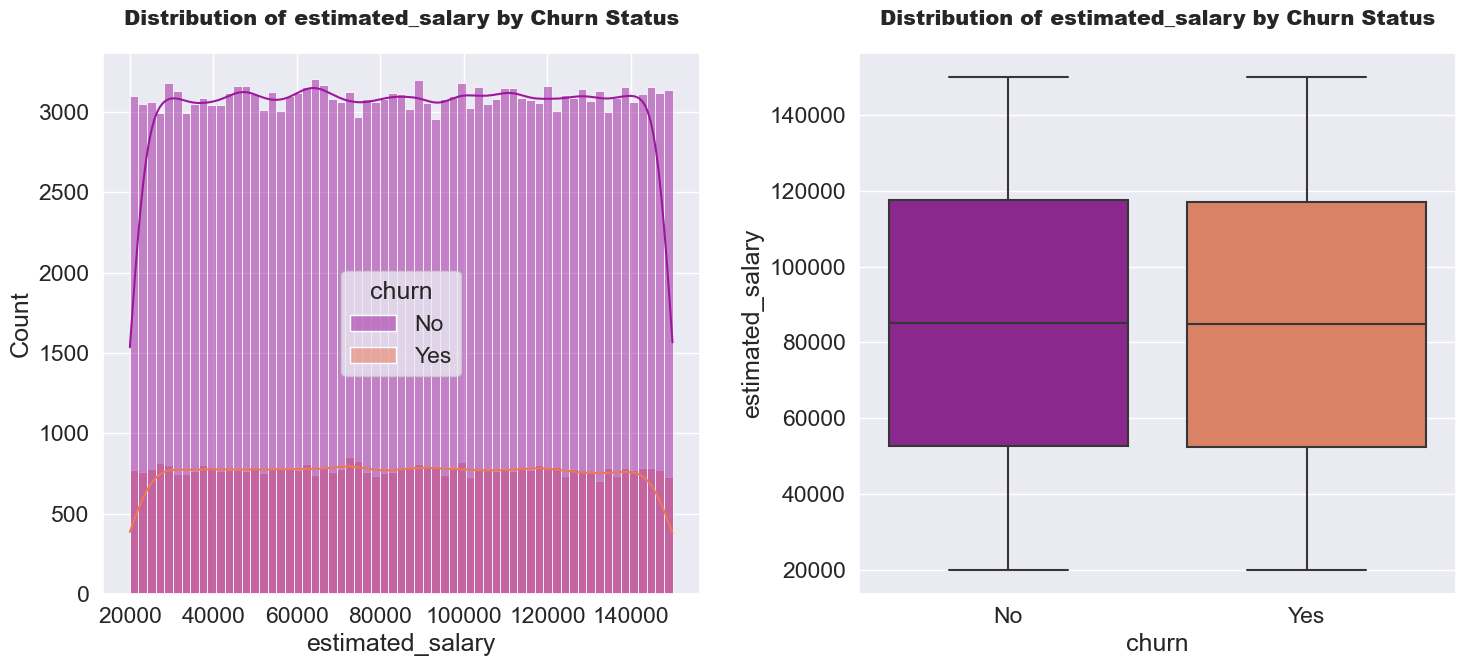

In [29]:
continous_plot("estimated_salary")

In [30]:
churn_salary=df[df['churn']=='Yes']['estimated_salary']
nonchurn_salary=df[df['churn']=='No']['estimated_salary']

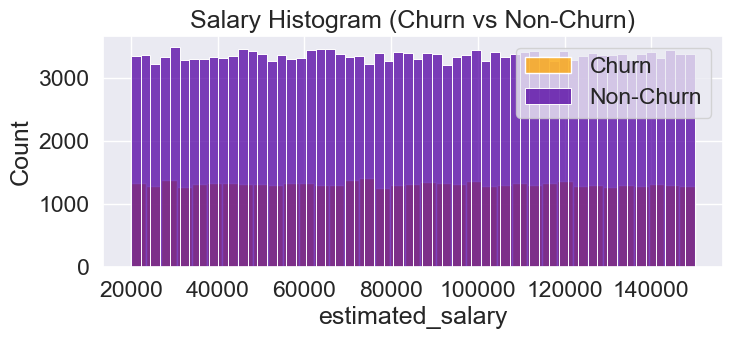

In [31]:
plt.figure(figsize=(8, 3))
sns.histplot(churn_salary, label="Churn", color="orange")
sns.histplot(nonchurn_salary, label="Non-Churn")
plt.title("Salary Histogram (Churn vs Non-Churn)")
plt.legend()
plt.show()

📊 Inference:
    
- Customer who churn have less salary in compare to non churn. Howerver, the median value of estimated_salary is             approxiamately same for both the churn categories.

In [32]:
churn_data_data_used=df[df['churn']=='Yes']['data_used']
non_churn_data_used=df[df['churn']=='No']['data_used']

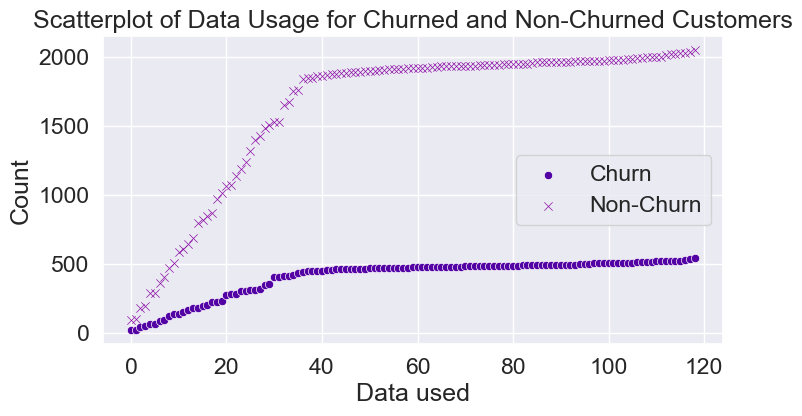

In [33]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=range(len(churn_value_calls_made)), y=churn_value_calls_made, label="Churn", marker='o')
sns.scatterplot(x=range(len(non_churn_value_calls_made)), y=non_churn_value_calls_made, label="Non-Churn", marker='x')
plt.xlabel("Data used")
plt.ylabel("Count")
plt.title("Scatterplot of Data Usage for Churned and Non-Churned Customers")
plt.legend()
plt.show()

📊 Inference:
    
- Non churn customers use more data than churn

In [34]:
df

,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,No
1,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,No
2,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,Yes
3,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,Yes
4,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,Airtel,F,28,Mizoram,Kolkata,110295,2023-05-03,3,130580,28,9,4102,No
243549,Reliance Jio,F,52,Assam,Kolkata,713481,2023-05-03,0,82393,80,45,7521,No
243550,Reliance Jio,M,59,Tripura,Kolkata,520218,2023-05-03,4,51298,26,4,6547,No
243551,BSNL,M,49,Madhya Pradesh,Kolkata,387744,2023-05-03,2,83981,80,15,1125,No


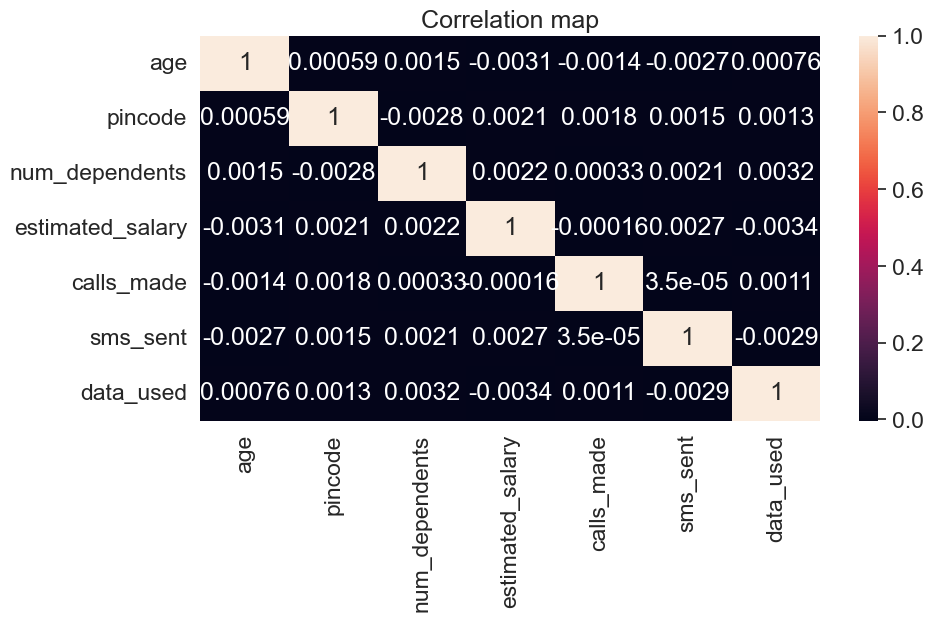

In [35]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation map")
plt.show()

# Data Preprocessing

1. Computing Unique Values of Categorical Columns.

In [36]:
cat_cols = ["telecom_partner","gender","state","city","date_of_registration"]

for column in cat_cols:
    print(f"Unique Values in {column} column is:",df[column].unique())
    print("-"*100,"\n")

Unique Values in telecom_partner column is: ['Reliance Jio' 'Vodafone' 'BSNL' 'Airtel']
---------------------------------------------------------------------------------------------------- 

Unique Values in gender column is: ['F' 'M']
---------------------------------------------------------------------------------------------------- 

Unique Values in state column is: ['Karnataka' 'Mizoram' 'Arunachal Pradesh' 'Tamil Nadu' 'Tripura'
 'Uttarakhand' 'Himachal Pradesh' 'Rajasthan' 'Odisha' 'Uttar Pradesh'
 'Chhattisgarh' 'Madhya Pradesh' 'Manipur' 'Goa' 'West Bengal' 'Gujarat'
 'Telangana' 'Maharashtra' 'Haryana' 'Andhra Pradesh' 'Sikkim' 'Assam'
 'Jharkhand' 'Kerala' 'Punjab' 'Nagaland' 'Bihar' 'Meghalaya']
---------------------------------------------------------------------------------------------------- 

Unique Values in city column is: ['Kolkata' 'Mumbai' 'Delhi' 'Chennai' 'Hyderabad' 'Bangalore']
------------------------------------------------------------------------------------

2. Performing label Encoding on Features.

In [37]:
from sklearn.preprocessing import LabelEncoder
model=LabelEncoder()
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=model.fit_transform(df[i])

In [38]:
df.head()

,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,2,0,25,10,4,755597,0,4,124962,44,45,-361,0
1,2,0,55,16,5,125926,0,2,130556,62,39,5973,0
2,3,0,57,1,2,423976,0,0,148828,49,24,193,1
3,1,1,46,22,4,522841,0,1,38722,80,25,9377,1
4,1,0,26,24,2,740247,0,2,55098,78,15,1393,0


3. Encoding Target Variable.

In [39]:
from sklearn.model_selection import train_test_split
x=df.drop("churn",axis=1)
y=df['churn']

In [40]:
df.head()

,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,2,0,25,10,4,755597,0,4,124962,44,45,-361,0
1,2,0,55,16,5,125926,0,2,130556,62,39,5973,0
2,3,0,57,1,2,423976,0,0,148828,49,24,193,1
3,1,1,46,22,4,522841,0,1,38722,80,25,9377,1
4,1,0,26,24,2,740247,0,2,55098,78,15,1393,0


4. Checking Skewness of Continous Features.

In [41]:
cols = ["age","pincode","num_dependents","estimated_salary","calls_made","sms_sent","data_used"]

In [42]:
df[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

,Feature Skewness
age,-0.007563
pincode,0.004915
num_dependents,0.001801
estimated_salary,0.000973
calls_made,-0.002494
sms_sent,0.005314
data_used,0.003788


5. Splitting Data For Model Training & Testing.

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

6. Applying SMOTE to Overcome the Class-Imbalance in Target Variable.

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
smote = SMOTE()
x_train1, y_train1 = smote.fit_resample(x_train, y_train)

In [60]:
from sklearn.preprocessing import StandardScaler

model=StandardScaler()

x_train1=pd.DataFrame(model.fit_transform(x_train1),columns=x_train.columns)
x_test=pd.DataFrame(model.fit_transform(x_test),columns=x_test.columns)

In [61]:
x_train1.shape

(272586, 12)

In [62]:
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (170487, 12)
Shape of x_test is:  (73066, 12)
Shape of y_train is: (170487,)
Shape of y_test is:  (73066,)


In [63]:
print(x_train_resampled.shape ,y_train_resampled.shape)

(272586, 12) (272586,)


In [64]:
y_train1.value_counts().to_frame()

,churn
0,136293
1,136293


📊 Inference:
* Data is **equally splitted** for **Model Training & Testing.** * So we can build a **Predictive Model** to find the **key factors** that are significantly influencing **customers churn.**

- Both the categories in Target variable are now having equal number of records.
- So we can train the Model pn balanced records for both churn categories and make a predictive model with low bias.


# Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

classifier7 = LogisticRegression()
classifier7.fit(x_train1,y_train1)

LogisticRegression()

In [71]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train,y_train)

print("accuracy without smoting",classifier.score(x_test,y_test))

accuracy without smoting 0.49911039334300494


In [72]:
y_pred7 = classifier7.predict(x_test)


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm7 = confusion_matrix(y_test, y_pred7)
print(cm7)

[[30064 28369]
 [ 7453  7180]]


In [73]:
print("accuracy without smoting",classifier7.score(x_test,y_test))

accuracy without smoting 0.5097309282018997


Text(0.5, 1.0, 'Confusion matrix for Logistic regression')

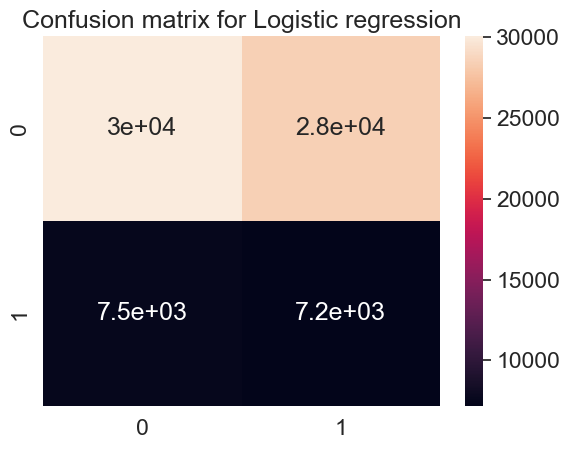

In [75]:
cn=confusion_matrix(y_test,y_pred7)
sns.heatmap(cn,annot=True)
plt.title("Confusion matrix for Logistic regression")

# Model Creation using DecisionTree

1. Finding the best Parameters for the Model.

In [76]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train1,y_train1)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

2. Computing Model Accuracy.

In [91]:
y_train_pred = clf.predict(x_train_resampled)
y_test_pred = clf.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train_resampled,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 75.58 %
Accuracy Score of Model on Testing Data  is => 20.03 %


In [92]:
 print("smoting data score in svm",clf.score(x_test,y_test))

smoting data score in svm 0.20027098787397696


3. Model Evaluation using Different Metric Values.

In [94]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred,average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred,average="micro"))

F1 Score of the Model is => 0.20027098787397696
Recall Score of the Model is => 0.20027098787397696
Precision Score of the Model is => 0.20027098787397696


📊 Inference:

- We can observe that recell, precision and F1 score are all the same, it means that our model is achieving perfect balance between correctly identifying positive samples (recall) and minimizing false positives (precision).

- The low values for F1 score, recall score, and precision score, all of which are approximately 0.2. These metrics         suggest that the model achieves low accuracy in predicting the positive class.

In [95]:
# Create Decision Tree classifer object
clfd = DecisionTreeClassifier()

# Train Decision Tree Classifer
clfd = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clfd.predict(x_test)

In [96]:
print("score on non-smoting data",clfd.score(x_test,y_test))

score on non-smoting data 0.20027098787397696


4. Model Evaluation using Confusion matrix

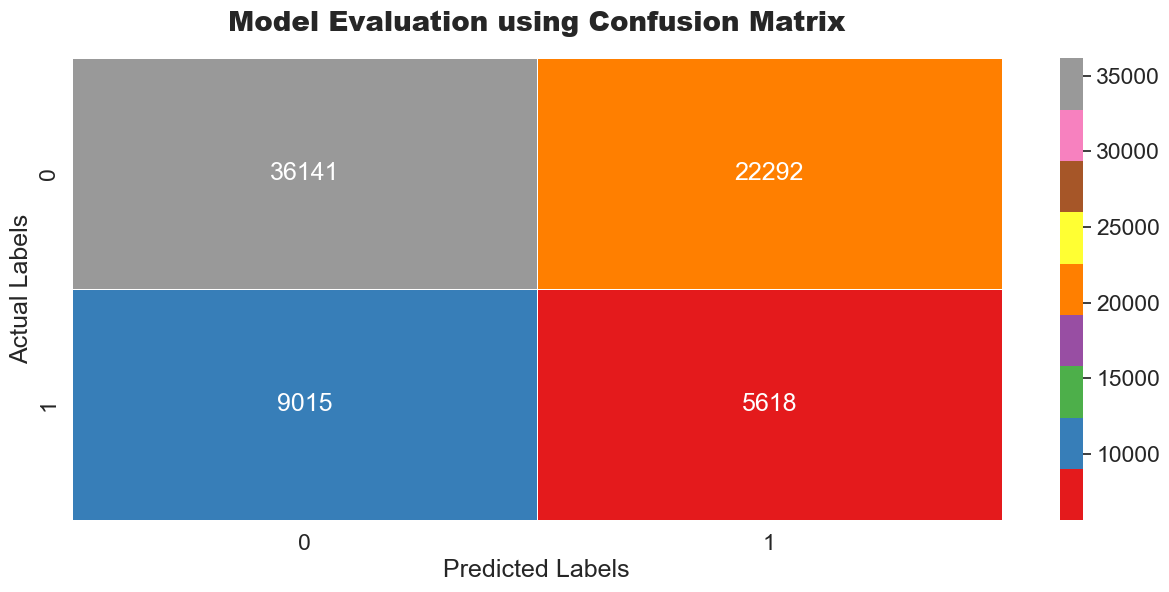

In [109]:
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

📊 Inference:

* **Strong True Positive Rate:** The model achieved a high number of true positive predictions, indicating its ability to correctly identify positive cases. This suggests that the model is effective in accurately classifying the desired outcome. * **Need of Improvement in False Negative Rate:** The presence of a relatively high number of false negatives suggests that the model may have missed identifying some actual positive cases. This indicates a need for further refinement to enhance the model's ability to capture all positive cases.

5. Finding Importance of Features in DecisionTreeClassifier.

In [98]:
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":clf.feature_importances_})

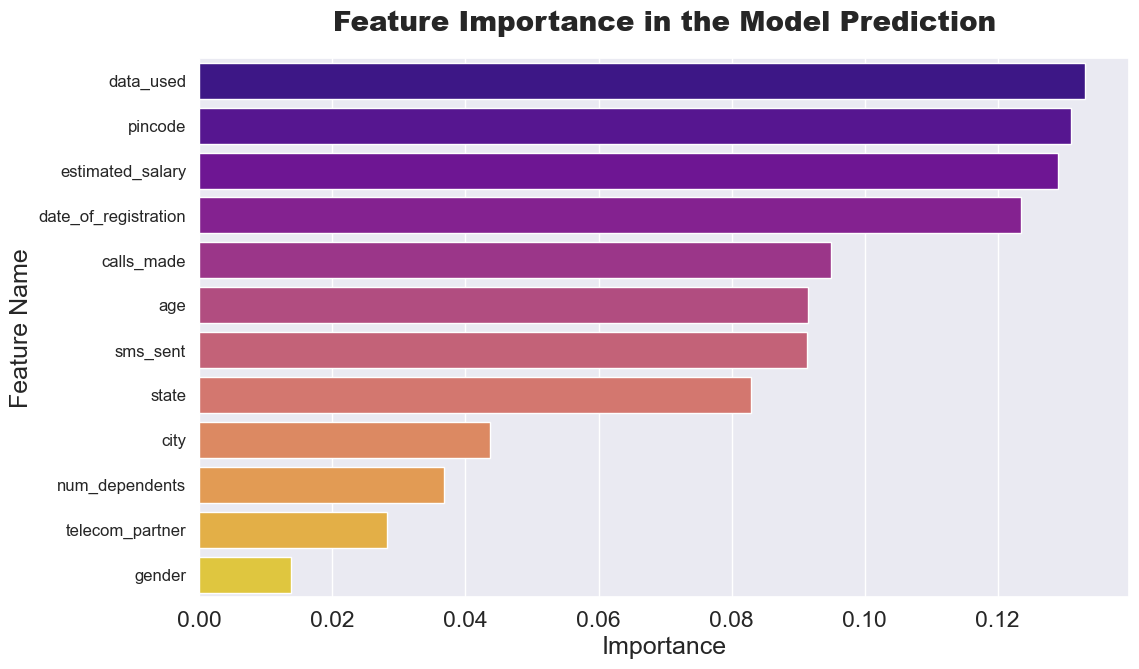

In [99]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

📊 Inference:
    
- The key factors that significantly influence the deactivation of customers telecom facilities are:- data_used, pincode, estimated_salary, date_of_registration, call_made and age.


- The minimal impact of features on the deactivation of customers' telecom facilities are:- gender, telecom_partner, num_dependents, city, state and sms_sent.

# Model Creation using Random Forest

1. Finding the best parameters for the model

In [82]:

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(x_train1, y_train1)


classifier_rf.score(x_test,y_test)

0.5715243752224016

2. Computing Model Accuracy.

In [102]:
y_train_pred = classifier_rf.predict(x_train_resampled)
y_test_pred  = classifier_rf.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train_resampled,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 50.0 %
Accuracy Score of Model on Testing Data  is => 57.15 %


3. Model Evaluation using Different Metric Values.

In [103]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred,average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred,average="micro"))

F1 Score of the Model is => 0.5715243752224016
Recall Score of the Model is => 0.5715243752224016
Precision Score of the Model is => 0.5715243752224016


4. Finding Importance of Features in RandomForest Model.

In [105]:
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":classifier_rf.feature_importances_})

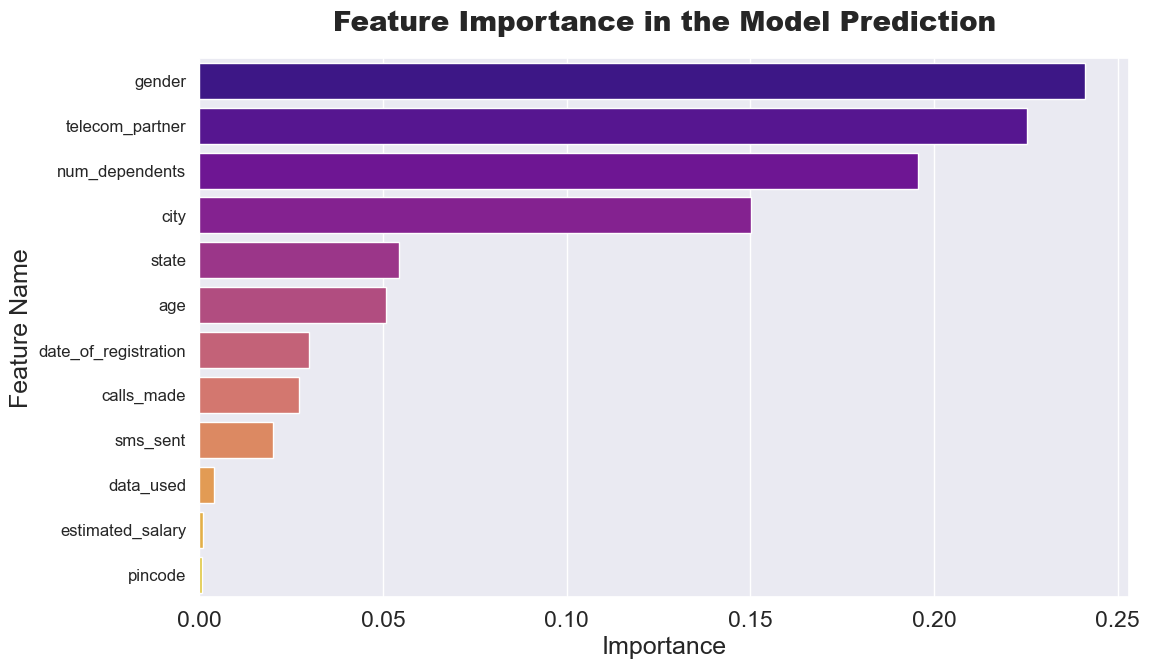

In [106]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

📊 Inference:
    
- The key factors that significantly influence the deactivation of customers telecom facilities are:- gender,                 telecom_partner, num_dependents, city, state, and age
- The minimal impact of features on the deactivation of customers' banking facilities are:- pincode, estimated_salary, data_used, sms_sent, calls_made, date_of_registration.

5.  Model Evaluation using Confusion Matrix.

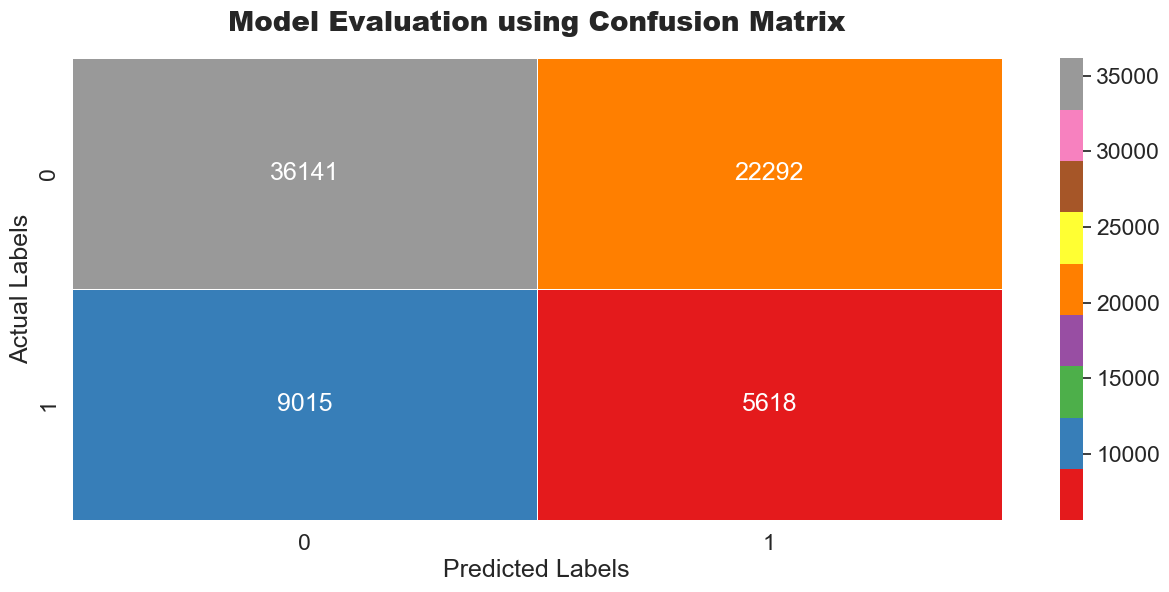

In [108]:
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

📊 Inference:

* **Strong True Positive Rate:** The model achieved a high number of true positive predictions, indicating its ability to correctly identify positive cases. This suggests that the model is effective in accurately classifying the desired outcome. * **Need of Improvement in False Negative Rate:** The presence of a relatively high number of false negatives suggests that the model may have missed identifying some actual positive cases. This indicates a need for further refinement to enhance the model's ability to capture all positive cases.

# Conclusion

📊 Key-Points

The key factors that significantly influence the deactivation of customers telecom facilities are data_used, pincode, estimated_salary, date_of_registration, call_made and age.

High Training and Testing Accuracies: Both the model achieved a moderate accuracy score the training data, indicating a good fit to the training instances. Additionally, the model's accuracy score over 50% on the testing data suggests its ability to generalize well to unseen instances.

F1 Score, Recall, and Precision: The model achieved average F1 score, recall, and precision values. This indicates that the model has a ability to correctly identify positive cases while minimizing false positives and maximizing true positives.
It suggests that the model is able to distinguish between positive and negative instances with a relatively high degree of accuracy.

Overall Model Performance: The model demonstrates a good performance across multiple evaluation metrics, indicating its effectiveness in making accurate predictions and capturing the desired outcomes.


📊 Recommendations


The telecom_providers can launch a scheme for customers with youthful ages (in the 20's) so that they not deactivate their banking facilities.
The telecom_providers can provide Rewards and Incentive Programs, Regular Communication and Updates, and Enhanced Digital Services so that customers remain active to the telecom facilities.